## Data Analysys Project: Analysis of Isekai Sub-Genre Growth (2000 - 2024)

### 1. Project Overview:
**Objective:**
    
- Analyse the growth of the Isekai anime sub-genre between 2000 and 2024 to determine whether its expansion is considerable and statistically abnormal compared to the wider anime industry.

**Key questions:**

- Has the Isekai sub-genre had a *considerable* growth during the period analysed?
- Does the Isekai sub-genre represent an abnormal amount of animes?
- Reasons for the Growth and Abnormality (assuming the first two questions yield a positive outcome)

**Note:** See the `README.md` for more information related to these questions.

### 2. Dataset Description:
**Data source:** Animes [1962-2024] by Youxise, licensed under *Creative Commons Attribution 4.0 International (CC BY 4.0)*. 

**Source:** [Kaggle](https://www.kaggle.com/datasets/youcmoulai/animes)

**License:** [creative commons](https://creativecommons.org/licenses/by/4.0/)

### 3. Imports and Enviroment Setup

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option("display.max_rows", None)

### 4. Data Loading
Only the relevant columns were loaded to reduce memory usage and focus the analysis on variables directly related to the research questions.

In [2]:
path = "../data/Animes.csv"

df = pd.read_csv(path, usecols=["Title", "Release", "Theme"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13551 entries, 0 to 13550
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Title    13551 non-null  object
 1   Release  13551 non-null  object
 2   Theme    8946 non-null   object
dtypes: object(3)
memory usage: 317.7+ KB


### 5. Data Cleaning & Filtering 
Since this analysis **focuses on sub-genres**, we begin by removing all rows without an assigned theme to avoid discrepancies between the total number of anime entries and the total number of sub-genres.

In [3]:
df = df.dropna(subset=["Theme"])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8946 entries, 1 to 13550
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Title    8946 non-null   object
 1   Release  8946 non-null   object
 2   Theme    8946 non-null   object
dtypes: object(3)
memory usage: 279.6+ KB


Since this analysis covers the period from 2000 to 2024, entries before 2000 are not relevant and will be removed.

In [4]:
df["Release"] = pd.to_datetime(df["Release"], format="mixed")
df = df[df["Release"].dt.year > 1999]
df.shape

(7308, 3)

To compare the growth of anime overall with that of the isekai sub-genre in particular, we will use two separate data frames from this point onwards. The data frame `df` contains all **anime** released during the analysed period, while `isekai_df` includes only **isekai** titles from the same timeframe.

In [5]:
isekai_df = df[df["Theme"].str.contains("isekai", case=False, na=False)]
isekai_df.shape

(296, 3)

### 6. Exploration
To understand the trend of the isekai sub-genre during the analysed period, we plot a line graph.

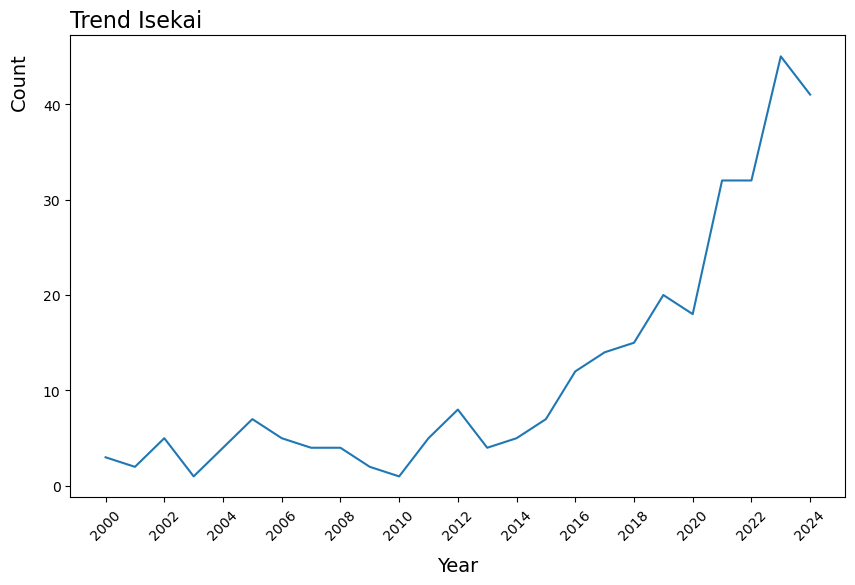

In [6]:
count_isekais = isekai_df["Release"].dt.year.value_counts().sort_index()
plt.figure(figsize=(10,6))
count_isekais.plot()
plt.xticks(count_isekais.index[::2], rotation=45)
plt.title("Trend Isekai", fontsize=16, loc="left")
plt.xlabel("Year", fontsize=14, labelpad=10)
plt.ylabel("Count", fontsize=14, labelpad=10, y=0.9)
plt.show()

**Observation:**
    There appear to be two pivotal years: **2013** and **2020**.

**Next step:**
    Compare this trend with overall anime releases during the same period.

To compare trends rather than absolute volumes, both series are normalised.

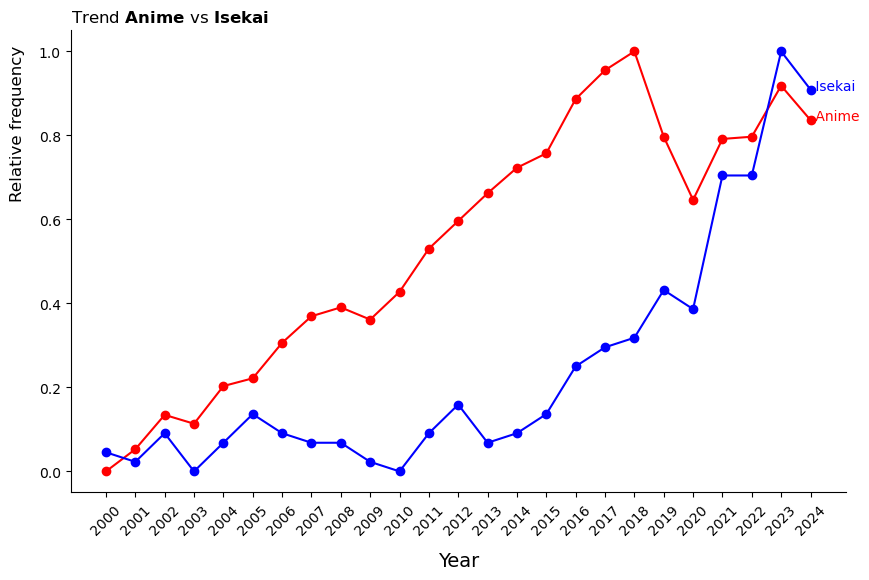

In [7]:
count_animes = df["Release"].dt.year.value_counts().sort_index()
isekai_norm = (count_isekais - count_isekais.min()) / (count_isekais.max() - count_isekais.min())
anime_norm = (count_animes - count_animes.min()) / (count_animes.max() - count_animes.min())
plt.figure(figsize=(10,6))                                                    
anime_norm.plot(color="red", marker="o")
isekai_norm.plot(color="blue", marker="o")
plt.xticks(count_isekais.index[::], rotation=45)
plt.title(r"Trend $\bf{Anime}$ vs $\bf{Isekai}$", loc="left")
plt.xlabel("Year", labelpad=10, fontsize=14)
plt.ylabel("Relative frequency", y=0.8, labelpad=10, fontsize=12)
plt.text(anime_norm.index[-1], anime_norm.values[-1], " Anime", color="red")
plt.text(anime_norm.index[-1], isekai_norm.values[-1], " Isekai", color="blue")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)                                    
plt.show()

**Observation:**
    The isekai genre shows slower relative growth than anime overall before 2020; however, from around 2020 onwards, its growth becomes noticeably sharper and outpaces the general anime trend.

**Interpretation:**
    Since the total number of anime releases has declined and has not returned to its previous peak, while the number of isekai anime has continued to grow, isekai represents an increasingly larger proportion of total anime releases each year.

**Next step:**
    To quantify how the importance of the isekai genre has changed over time, we plot the percentage of isekai anime released each year relative to the total number of anime.

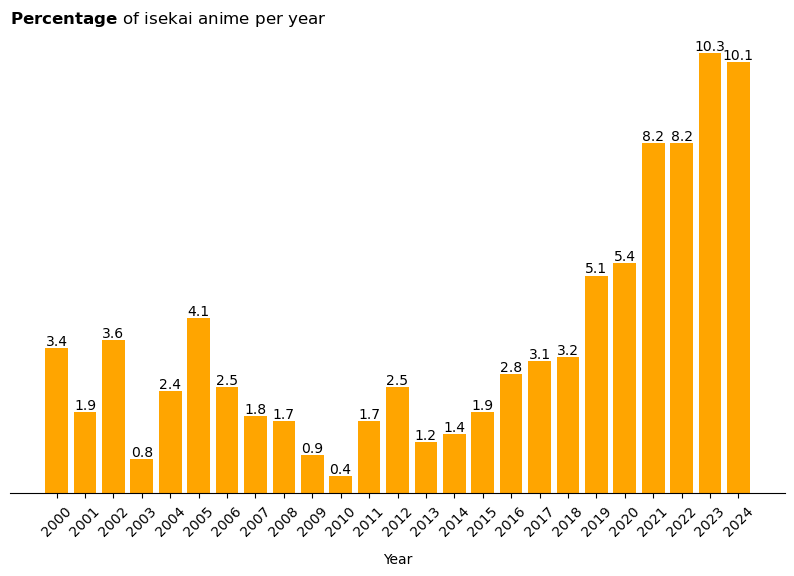

In [8]:
percentage_isekai = round((count_isekais / count_animes) * 100,1)
plt.figure(figsize=(10, 6))
bars = plt.bar(percentage_isekai.index, percentage_isekai.values, color="orange")
plt.bar_label(bars)        
plt.title(r"$\bf{Percentage}$ of isekai anime per year", loc="left")
plt.xlabel("Year", labelpad=10)
plt.xticks(percentage_isekai.index[:], rotation=45)
plt.gca().yaxis.set_visible(False)           
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)    
plt.gca().spines["left"].set_visible(False)                                    
plt.show()

**Observation:**
    The proportion of isekai anime increases consistently over time, with a marked rise after 2020. This indicates that isekai is not only growing in absolute terms, but also becoming a more dominant sub-genre within the anime industry.

**Next step:** 
    To put the isekai genre into perspective, we plot a histogram of genre frequencies over the analysed period. This allows us to assess whether isekai lies close to the average genre output or stands out as an outlier compared to other genres.

In [9]:
df["Theme"] = df["Theme"].str.split(",\\s*")
genres_counts = df.explode("Theme")["Theme"].value_counts()

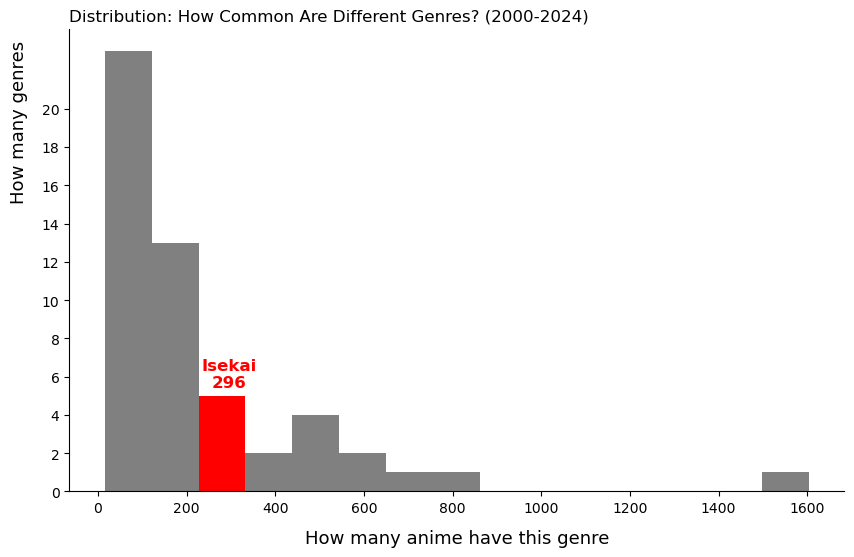

In [10]:
plt.figure(figsize=(10,6))
counts, bins, patches = plt.hist(genres_counts, bins="fd", color="grey")      
plt.xlabel('How many anime have this genre', labelpad=10, fontsize=13)
plt.ylabel('How many genres', y=0.8, labelpad=10, fontsize=13)
plt.title('Distribution: How Common Are Different Genres? (2000-2024)', loc="left")  
plt.yticks(range(0,21,2))

plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)  

genre_name = "Isekai"
genre_freq = genres_counts[genre_name]

bin_index = None
for i in range(len(bins)-1):
    if bins[i] <= genre_freq < bins[i+1]:
        bin_index = i
        break

if bin_index is not None:
    patches[bin_index].set_facecolor('red')
    plt.text(genre_freq, counts[bin_index] + 0.3,  
             f'{genre_name}\n{genre_freq}',
             fontsize=12,
             ha='center',  
             va='bottom',  
             color='red',
             fontweight='bold')
plt.show()

**Observation:**
    There is a major outlier: the school sub-genre. Isekai is not a niche genre, but it is also not among the most popular genres in the period analysed.

**Interpretation:** Even so, we did see that the isekai had a steady grow in the most recent years. Thus we considered neccesary do the same with two new periods to reflect correctly that growth.

**Next step:** Plot two histograms over the periods 2014-2024 and 2020-2024.

In [11]:
period_10_years = df[df["Release"].dt.year > 2013]
genres_counts = period_10_years.explode("Theme")["Theme"].value_counts()

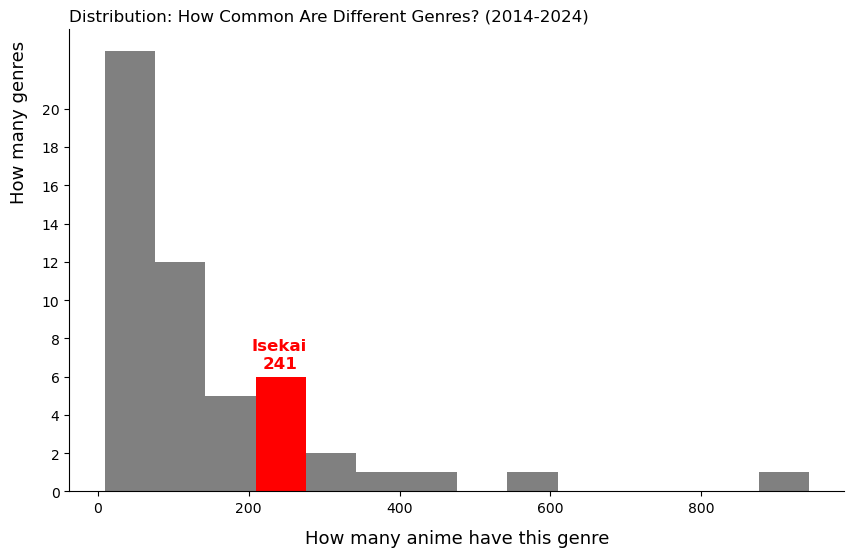

In [12]:
plt.figure(figsize=(10,6))
counts, bins, patches = plt.hist(genres_counts, bins="fd", color="grey")      
plt.xlabel('How many anime have this genre', labelpad=10, fontsize=13)
plt.ylabel('How many genres', y=0.8, labelpad=10, fontsize=13)
plt.title('Distribution: How Common Are Different Genres? (2014-2024)', loc="left") 
plt.yticks(range(0,21,2))

plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)  

genre_name = "Isekai"
genre_freq = genres_counts[genre_name]

bin_index = None
for i in range(len(bins)-1):
    if bins[i] <= genre_freq < bins[i+1]:
        bin_index = i
        break

if bin_index is not None:
    patches[bin_index].set_facecolor('red')
    plt.text(genre_freq, counts[bin_index] + 0.3,  
             f'{genre_name}\n{genre_freq}',
             fontsize=12,
             ha='center',  
             va='bottom',  
             color='red',
             fontweight='bold')
plt.show()

**Observation:**
    Once again school is the predominant sub-genre. On the other hand, Isekai became a bit more popular

In [13]:
period_5_years = df[df["Release"].dt.year > 2019]
genres_counts = period_5_years.explode("Theme")["Theme"].value_counts()

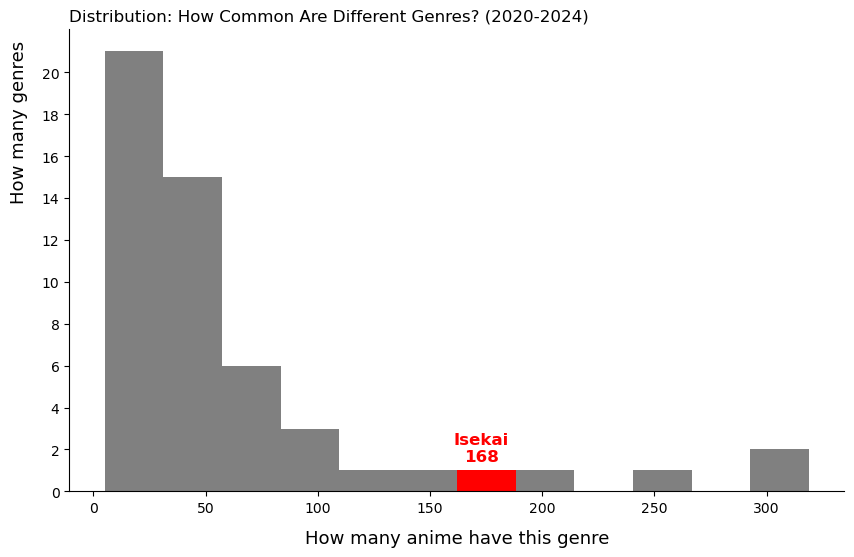

In [14]:
plt.figure(figsize=(10,6))
counts, bins, patches = plt.hist(genres_counts, bins="fd", color="grey")      
plt.xlabel('How many anime have this genre', labelpad=10, fontsize=13)
plt.ylabel('How many genres', y=0.8, labelpad=10, fontsize=13)
plt.title('Distribution: How Common Are Different Genres? (2020-2024)', loc="left")
plt.yticks(range(0,21,2))
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)  

genre_name = "Isekai"
genre_freq = genres_counts[genre_name]

bin_index = None
for i in range(len(bins)-1):
    if bins[i] <= genre_freq < bins[i+1]:
        bin_index = i
        break

if bin_index is not None:
    patches[bin_index].set_facecolor('red')
    plt.text(genre_freq + 5, counts[bin_index] + 0.3,  
             f'{genre_name}\n{genre_freq}',
             fontsize=12,
             ha='center',  
             va='bottom',  
             color='red',
             fontweight='bold')
plt.show()

**Observation:**
    Now the isekai has become one of the most popular sub-genres in the industry. The outlier continue to be school.

### 7. Insights

It is clear that isekai has grown slowly but steadily throughout most of the period analysed. However, in the most recent years (2020–2024), its growth has outpaced the general growth of the industry, making it one of the most popular sub-genres.

While it would be incorrect to consider its current volume abnormal, it is clearly among the most popular sub-genres.

**Next step:** Proceed to the following notebook to see a statistical analysis of this phenomenon.